# Introduction - Bank Customer Churn Prediction

Question - can we predict which customers will exit the bank?

A common understanding in business is that known as the Leaky Bucket theory. Plugging a hole in a leaky bucket is more efficent than continuously adding water. That is to say that it's much easier, and cheaper to keep the customers you have than to try find new ones consistently. The best way for a business to save money is to ensure the current customers remain in the business for as long as possible. Predicting which customers are likely to leave will greatly help in concentrating their efforts to keep customers.

Using this data we will determine what factors drive churn rate in order to prevent churn for banks.

The below data will review customers in France, Germany and Spain specifically to answer the question at hand.

First thoughts are to prepare the data for a few classification algorithims such as Log regression and KNN.

In [1]:
#import initial libraries

import pandas as pd
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("Set2", n_colors=8)

#import statistical libraries
import scipy.stats as ss

#import libraries for train and test split
from sklearn.model_selection import train_test_split

#import pre-processing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#import feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#import the ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#import finetuning library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
#load in dataset

df = pd.read_csv("Churn_Modelling.csv")
display(df.head())
print("\n")
display(df.describe())
print("\n")
display(df.info())
print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
print(df.nunique())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

There are 10000 rows and 14 columns
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


# Cleaning the data

On the surface, the data appears to have no null values. What remains now is to remove all unnecessary features, namely, "Row Number", "Customer_Id", "Surname".

In [3]:
#drop the redundant features
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

#convert objects to categories
df[['Geography','Gender']].astype('category')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


# Additional Descriptive Stats

In [4]:
#review statistics of new categories
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#Skewness of numeric data
df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].skew(axis = 'rows')

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [7]:
#Kurtosis of numeric data
df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].kurtosis(axis = 'rows')

CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
EstimatedSalary   -1.181518
dtype: float64

In [8]:
df[['IsActiveMember','HasCrCard','NumOfProducts','Tenure']].mode(axis = 'rows')

,IsActiveMember,HasCrCard,NumOfProducts,Tenure
0,1,1,1,2


### Observations of the dataframe

This datafame shows no null values, a nice surprise when dealing with a new set of data. There are 10 000 data points, across 13 features. 

#### Reviewing the descriptive statistics, the following observations are made about the features:

Credit Score: The average credit score in the study is 650 although there is a minimum credit score of 350 and maximum of 850 in the study.

Geography: Most customers are based in France (over 50%), while the remaining customers live in Spain and Germany

Age: The average age of the account holder is 38.9 (38 years and about 11 months) while the median is 37, suggesting that the age data is negatively skewed towards the older population. The oldest customer is 92 years old. 

Tenure: the average customer has been with the bank for 5 years, although there are customer who have been with the bank for up to 10 years. Two years is the most frequent amount for customers in this dataset.

Balance:25% of bank customers have a zero balance. This may be after consuming a salary or allowance to completion every month, or this account remains empty for prolonged/unpredictable periods of time due to sporadic employment, infrequent allowance etc. The average amount in a customers bank account at the time of study is 76485.89, lower than the median of 97198, however it shows skewness of -0.14, so it is relatively symmetrical in distribution.

NumOfProducts: most customers have 1 product with the bank at the time of the study.

HasCrCard: similar to the above feature, most customers (70.5%) have a credit card 

IsActiveMember: this understanding variable is not intuitive i.e. How is this variable defined? Further understanding would be required to offer a thorough analysis. However, it is evident that about 51% of the customers are active users.

EstimatedSalary: ranges from 11.58 to 199 992.48, and the data is balaneced with a skewness of 0.002

Exited: 80%  customers in the database have remained in the company, leaving 20% who have exited. We will attempt to predict the exiting customers in this study.

# Exploratory Data Analysis

An initial understanding of the dataset is imperative. Visualising the data is the best way to do this.

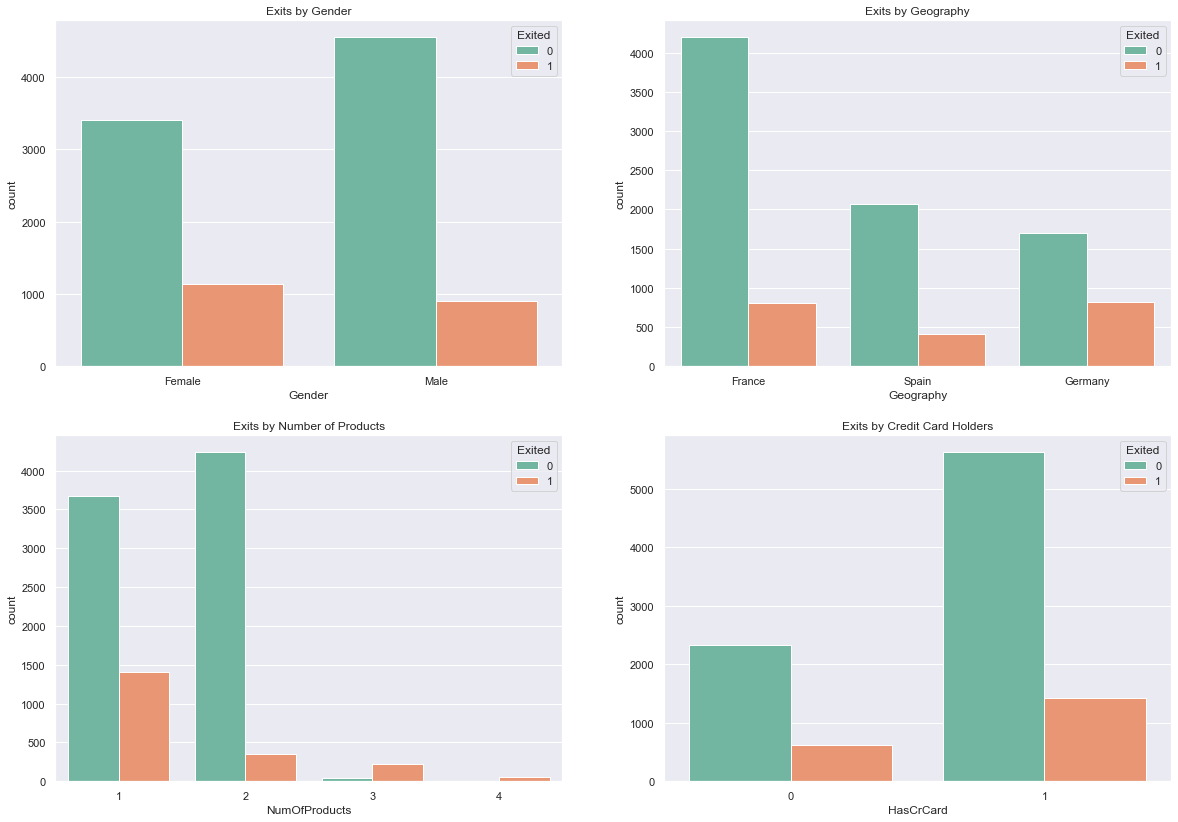

In [9]:
fig, ax = plt.subplots(2,2, figsize = (20,14))

sns.countplot(x = 'Gender', data = df, hue = 'Exited', ax = ax[0][0]).set(title ='Exits by Gender')
sns.countplot(x = 'Geography', data = df, hue = 'Exited', ax = ax[0][1]).set(title ='Exits by Geography')
sns.countplot(x = 'NumOfProducts', data = df, hue = 'Exited', ax = ax[1][0]).set(title ='Exits by Number of Products')
sns.countplot(x = 'HasCrCard', data = df, hue = 'Exited', ax = ax[1][1]).set(title ='Exits by Credit Card Holders')

plt.show()

In [10]:
df.groupby(['Exited'])['Gender','NumOfProducts','Tenure','Age','CreditScore','HasCrCard','IsActiveMember','EstimatedSalary'].mean().round(2)

C:\Users\E5570\AppData\Local\Temp\ipykernel_10204\1619320028.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Exited'])['Gender','NumOfProducts','Tenure','Age','CreditScore','HasCrCard','IsActiveMember','EstimatedSalary'].mean().round(2)


,NumOfProducts,Tenure,Age,CreditScore,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,
0,1.54,5.03,37.41,651.85,0.71,0.55,99738.39
1,1.48,4.93,44.84,645.35,0.70,0.36,101465.68


In [11]:
display(df['Gender'].value_counts(normalize=True)*100)
display(df.groupby(['Gender'])['Exited'].mean().round(2))

Male      54.57
Female    45.43
Name: Gender, dtype: float64

Gender
Female    0.25
Male      0.16
Name: Exited, dtype: float64

In [12]:
display(df['Geography'].value_counts(normalize=True)*100)
display(df.groupby(['Geography'])['Exited'].mean().round(2))

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

Geography
France     0.16
Germany    0.32
Spain      0.17
Name: Exited, dtype: float64

In [13]:
df['NumOfProducts'].value_counts(normalize=True)*100
display(df.groupby(['NumOfProducts'])['Exited'].mean().round(2))

NumOfProducts
1    0.28
2    0.08
3    0.83
4    1.00
Name: Exited, dtype: float64

In [14]:
display(df['HasCrCard'].value_counts(normalize=True)*100)
display(df.groupby(['HasCrCard'])['Exited'].mean().round(2))

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

HasCrCard
0    0.21
1    0.20
Name: Exited, dtype: float64

In [15]:
display(df['Tenure'].value_counts(normalize=True)*100)
display(df.groupby(['Tenure'])['Exited'].mean().round(2))

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

Tenure
0     0.23
1     0.22
2     0.19
3     0.21
4     0.21
5     0.21
6     0.20
7     0.17
8     0.19
9     0.22
10    0.21
Name: Exited, dtype: float64

### Observations

Exits by Gender: female customers show higher exits than male (25% vs 16%), despite representing a fewer being a smaller proportion of the study to male customers. 

Exits by Geography: customers is Germany are more likely to exit than France and Spain customers.

Exits by Number of Products: customers who own 3 or 4 products from the bank are most likely to exit the bank, while those with 2 products show the least likelihood of churn.

Exits by CrCard Ownership: when it comes to exiting the bakn, there is no significant difference between consumers who have a credit cards compared to those who have.

Additional observations on exiting: data shows a higher age average for consumers who have left the business than those who have remained at the time of the study. Another observation to highlight is the active members. Exited consumers show lower activity at the time of exiting than other consumers. There were no significant differences in exits in Tenure, and estimate salary. Further investigation is necessary for the some variables including 
##### Credit Score, Age, Tenure, Balance and Estimated Salary

<AxesSubplot:>

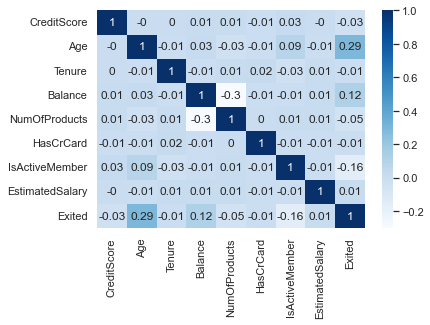

In [16]:
#determine any correlation with the dependent variable ('Exited') as well as possible inter-correlation between variables
sns.heatmap(df.corr().round(2), cmap='Blues', annot=True)

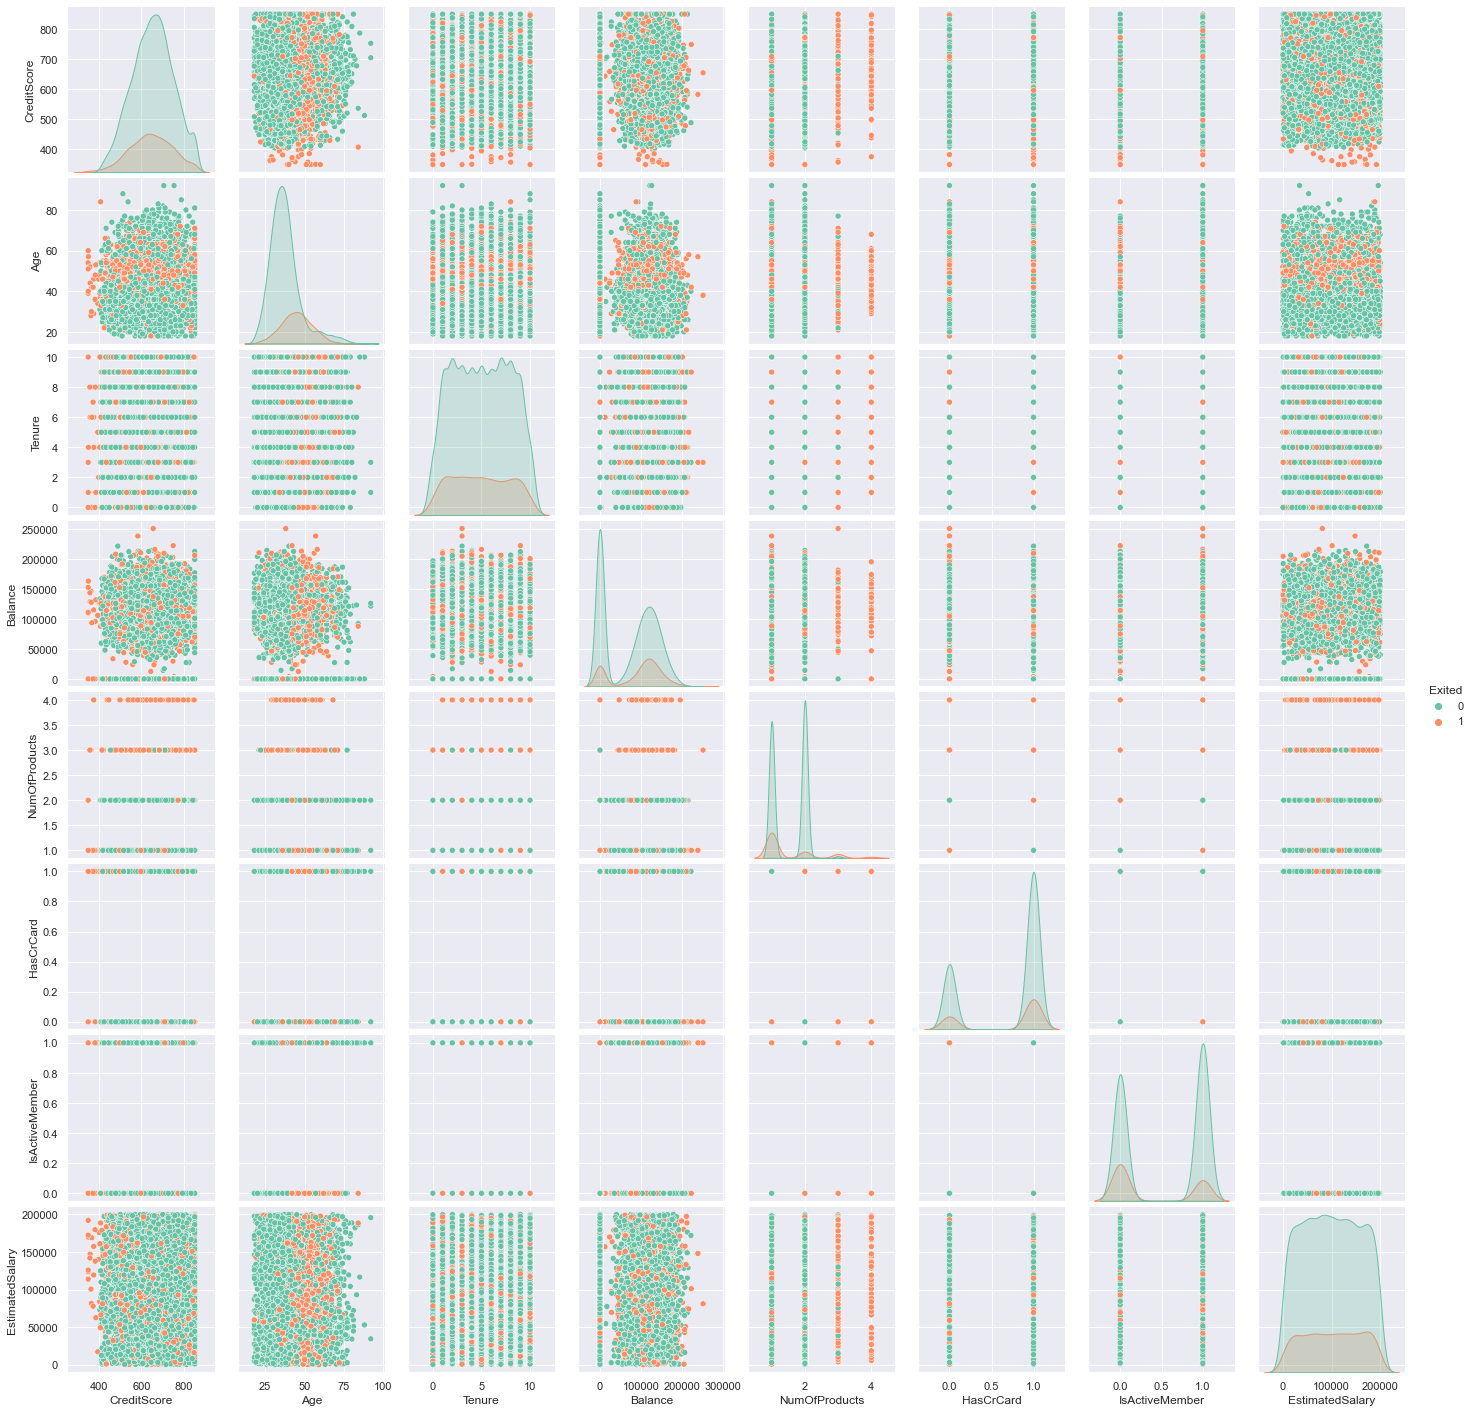

In [17]:
#intial exploration of the data
sns.pairplot(data = df, hue= 'Exited')

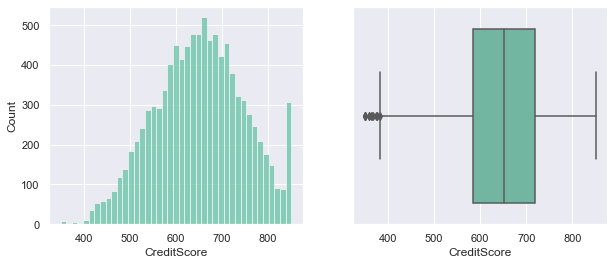

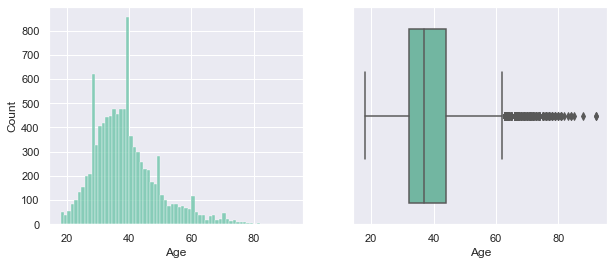

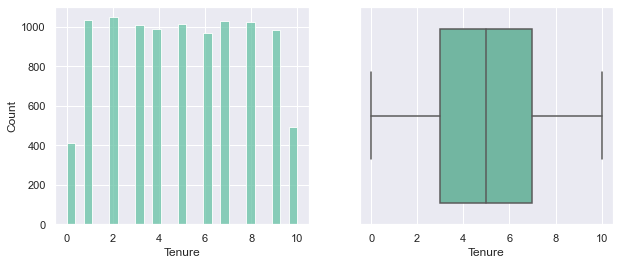

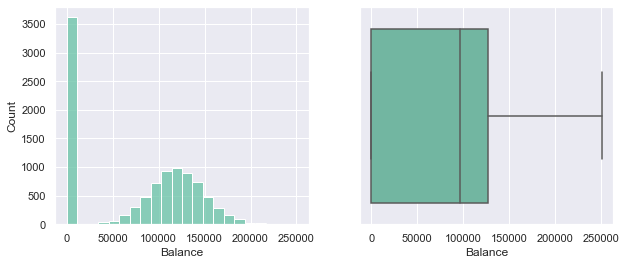

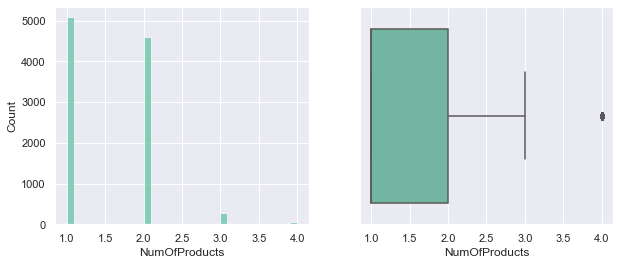

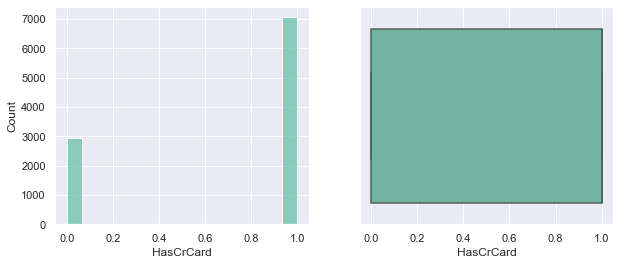

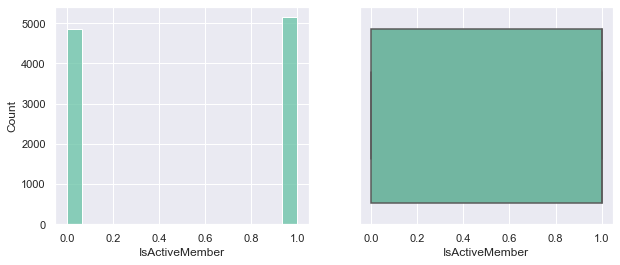

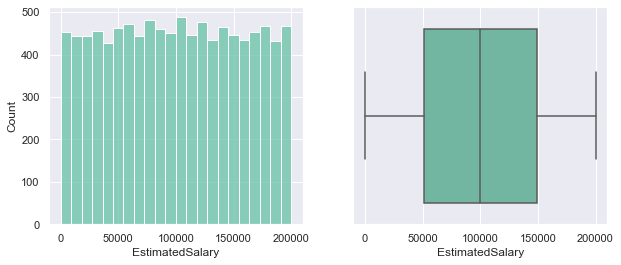

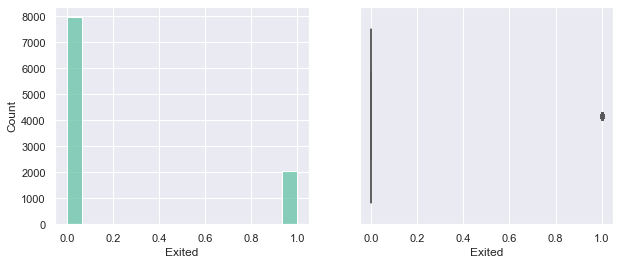

In [18]:
for col in df.select_dtypes('number').columns:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])

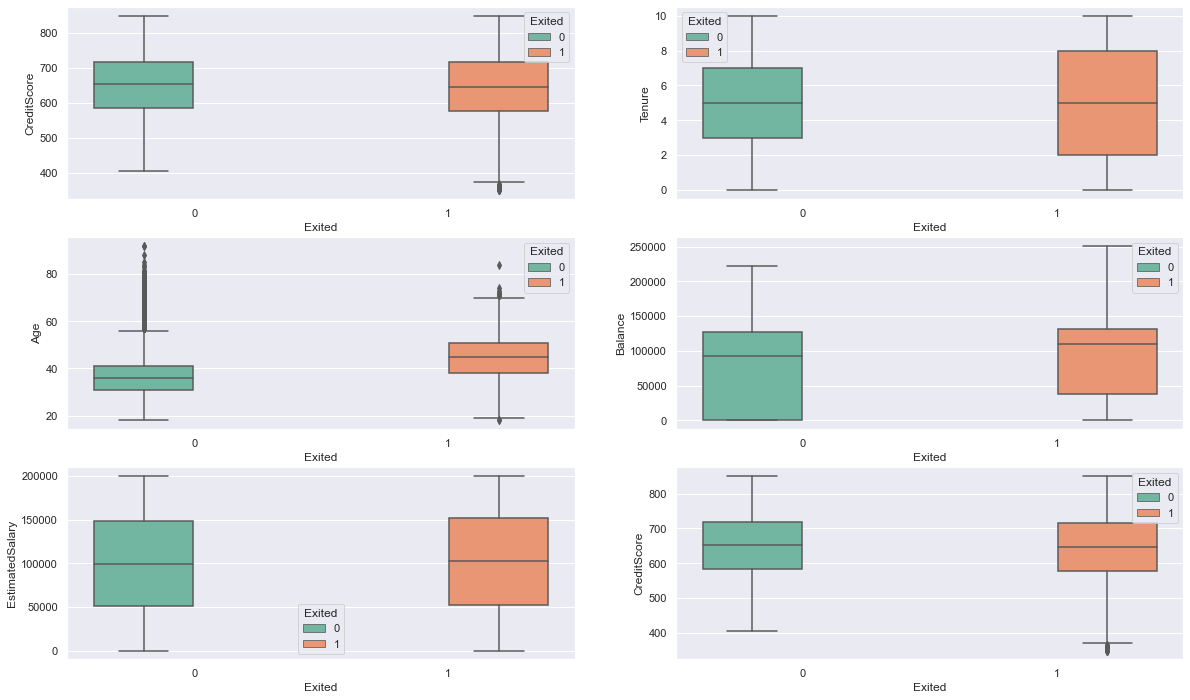

In [19]:
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize = (20, 12))

sns.boxplot(x = 'Exited', y = 'CreditScore', data=df, hue = 'Exited', ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Tenure', data=df, hue = 'Exited', ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Age', data=df, hue = 'Exited', ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'Balance', data=df, hue = 'Exited', ax = ax[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data=df, hue = 'Exited', ax = ax[2][0])
sns.boxplot(x = 'Exited', y = 'CreditScore', data=df, hue = 'Exited', ax = ax[2][1])

plt.show()

### Observations

Credit Score: credit scores appear similar when comparing those who exit the company and those who have, suggesting that there is no significance in determining churn.

Age: as confirmed in the previous observation, there is a significant difference in the ages of those who leave the bank. However, there are significant outliers of consumers who stayed in the bank. This may suggest that there is a point when customers may choose to remain in a bank regardless the other variables such as geography and gender. 

Tenure: the IQR of those who have exited is wider than those who remain within the company. Judging churn solely on this feature will be challenging given the wider range consumers will exit the business. However, there is an opportunity to encourage consumers to stay in the bank using early intervention methods. 

Balance: consumers in the higher balance range have a higher rate of churn than those with lower amounts, according to the above boxplot. 

Estimated Salary: there are no significant difference in churn when comparing customers that left or stayed with the bank

# Further cleaning of data

After reviewing the boxplot and histograms, a few outliers are clear.

CreditScore, Age, NumOfProducts, Balance : remove outliers

In [20]:
#Columns that require removal of outliers
cols = ['CreditScore', 'Age','NumOfProducts','Balance','EstimatedSalary'] # one or more

#Q1, Q3 and IQR determined
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#remove outliers based on data that lies outside (IQR + 1.5) and (IQR - 1.5)
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9568 non-null   int64  
 1   Geography        9568 non-null   object 
 2   Gender           9568 non-null   object 
 3   Age              9568 non-null   int64  
 4   Tenure           9568 non-null   int64  
 5   Balance          9568 non-null   float64
 6   NumOfProducts    9568 non-null   int64  
 7   HasCrCard        9568 non-null   int64  
 8   IsActiveMember   9568 non-null   int64  
 9   EstimatedSalary  9568 non-null   float64
 10  Exited           9568 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 897.0+ KB


# Data Pre-processing

The data needs to be transofrmed to a form that is suitable for machine learning (ML).
Some of the features (i.e. Geography) will need to be coded into dummy variables.

and others (ie. Credit Score, Age, Tenure, Balance) will need to be scaled.

For future reference, the coding will describe the following:

#### Gender: 0 == Female, 1 == Male

#### Geography: 0 == France, 1 == Germany, 2 == Spain

In [10]:
print(df['Gender'].value_counts())
print("\n")
print(df['Geography'].value_counts())

Male      5236
Female    4332
Name: Gender, dtype: int64


France     4798
Germany    2398
Spain      2372
Name: Geography, dtype: int64


In [29]:
#convert 'Geography' into dummy variables
geography = ['France','Germany','Spain']
gender = ['Male','Female']

df_dummies = pd.get_dummies(df, drop_first=True)

In [30]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9568 non-null   int64  
 1   Age                9568 non-null   int64  
 2   Tenure             9568 non-null   int64  
 3   Balance            9568 non-null   float64
 4   NumOfProducts      9568 non-null   int64  
 5   HasCrCard          9568 non-null   int64  
 6   IsActiveMember     9568 non-null   int64  
 7   EstimatedSalary    9568 non-null   float64
 8   Exited             9568 non-null   int64  
 9   Geography_Germany  9568 non-null   uint8  
 10  Geography_Spain    9568 non-null   uint8  
 11  Gender_Male        9568 non-null   uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 1.0 MB


In [31]:
#Identify X and y in dataframe
X = df_dummies.drop('Exited', axis = 1)
y = df['Exited']

# Prepare Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 123, stratify= y)

In [32]:
#Feature scaling of X train variables CreditScore, Age, Tenure, Balance, Estimated Salary
# fit scaler on training data
norm = MinMaxScaler().fit(X_train[['CreditScore','Tenure','Age','Balance','EstimatedSalary']])

# transform training data
X_train_norm = norm.transform(X_train[['CreditScore','Tenure','Age','Balance','EstimatedSalary']])

# transform testing dataabs
X_test_norm = norm.transform(X_test[['CreditScore','Tenure','Age','Balance','EstimatedSalary']])

In [33]:
#convert remaining features to numpy array
train_dummies = X_train[['NumOfProducts','HasCrCard','IsActiveMember','Geography_Germany','Geography_Spain','Gender_Male']].values
test_dummies = X_test[['NumOfProducts','HasCrCard','IsActiveMember','Geography_Germany','Geography_Spain','Gender_Male']].values

#add features with dummy variables to the X train and test arrays
X_train_full = np.append(X_train_norm, train_dummies, axis= 1)
X_test_full = np.append(X_test_norm, test_dummies, axis= 1)

In [34]:
print(X_train_full.shape)
print(X_test_full.shape)

(7176, 11)
(2392, 11)


In [35]:
X_train_full

array([[0.62, 0.4 , 0.23, ..., 0.  , 0.  , 1.  ],
       [0.85, 0.6 , 0.66, ..., 0.  , 1.  , 0.  ],
       [0.64, 0.5 , 0.41, ..., 0.  , 1.  , 1.  ],
       ...,
       [0.75, 0.3 , 0.16, ..., 0.  , 0.  , 0.  ],
       [0.82, 0.9 , 0.57, ..., 0.  , 0.  , 1.  ],
       [0.53, 0.6 , 0.5 , ..., 0.  , 0.  , 0.  ]])


# Preparing data for machine learning (ML)

The outliers have been removed. The next step is to prepare the dataset for machine learning.

We will start by performing a univariate feature selection exercise using SelectKBest. This is so that we reduce the likelihood of overfitting and improving the power of the ML algorithm.

In [36]:
#Feature selection - SelectKBest

kbest_test = SelectKBest(score_func=chi2, k=6)
kbest_fit = kbest_test.fit(X_train_full, y_train)
print(kbest_fit.scores_)
print(kbest_fit.transform(X_train_full).shape)

featured_data_train = kbest_fit.transform(X_train_full)
feature_data_test = kbest_fit.transform(X_test_full)
print ("\nFeatured training data:\n", featured_data_train[0:])

[5.46e-02 4.60e-01 8.03e+01 1.61e+01 3.49e-03 1.28e+01 3.27e-01 7.83e+01
 1.54e+02 1.16e+01 4.02e+01]
(7176, 6)

Featured training data:
 [[0.23 0.67 1.   1.   0.   1.  ]
 [0.66 0.51 2.   0.   0.   0.  ]
 [0.41 0.   2.   1.   0.   1.  ]
 ...
 [0.16 0.37 1.   0.   0.   0.  ]
 [0.57 0.63 2.   0.   0.   1.  ]
 [0.5  0.   2.   1.   0.   0.  ]]


# Compare multiple classification models

We have reduced the features down from 10 to 6. It is now time to test out a few classification models to determine the best predictive model for this data.

It is most efficient to test out multiple models at once for easier comparison and reduced time spent.
The following models will be reviewed.

Logistic Regression (LR),
Random Forest Classifier (RF),
KNeigborsClassifier (KNN),
Gaussian Naive Bayes (NB), and
Support Vector Classification (SVC)

LR: 0.829016 (0.012131)
RF: 0.839741 (0.009620)
KNN: 0.847823 (0.009078)
NB: 0.828873 (0.010346)
SVM: 0.854794 (0.007596)


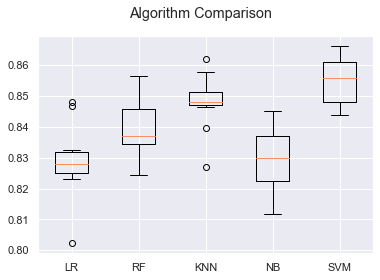

In [37]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, featured_data_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Hyperparameter Tuning - KNN and SVM

As shown in the above results, the two highest performing models were KNN and SVM. However, non of the models reached a high enough threshhold for a predictive model. We will attempt to improve this through hyperparameter tuning. 

SVM_poly_3: 0.841140 (0.010513)
SVM_poly_5: 0.846016 (0.009280)
SVM_linear: 0.854794 (0.007596)


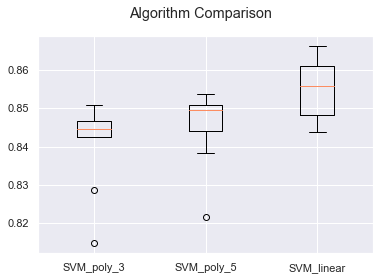

In [38]:
# prepare models
models = []
models.append(('SVM_poly_3', SVC(kernel='poly', degree=3)))
models.append(('SVM_poly_5', SVC(kernel='poly', degree=5)))
models.append(('SVM_linear', SVC(kernel='rbf')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, featured_data_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
#Tuning SVM parameters
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(featured_data_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   1.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   1.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=   1.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.802 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.869 total time=  20.9s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.852 total time=  13.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.843 total time=  12.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.854 total time=  11.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.865 total time=   4.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time=   5.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.859 total time=   4.9s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.848 total time=   5.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.852 total time=   3.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.862 total time=   1.9s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.870 total time=   1.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.856 total time=   1.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_.round(5))

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)
0.85744


In [32]:
svm_pred = grid.predict(feature_data_test)

# print classification report
print('The Classification Report for the tuned SVM model:')
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

The Classification Report for the tuned SVM model:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1919
           1       0.86      0.33      0.47       473

    accuracy                           0.86      2392
   macro avg       0.86      0.66      0.69      2392
weighted avg       0.86      0.86      0.83      2392

[[1893   26]
 [ 319  154]]


The Classification Report for the tuned SVM model:


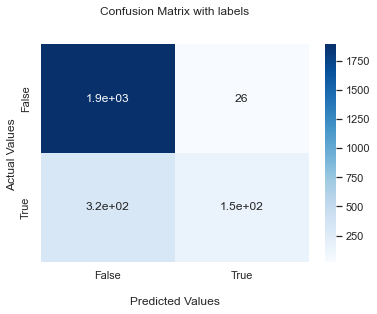

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1919
           1       0.86      0.33      0.47       473

    accuracy                           0.86      2392
   macro avg       0.86      0.66      0.69      2392
weighted avg       0.86      0.86      0.83      2392



In [41]:
grid_predictions = grid.predict(feature_data_test)
 
# print classification report
print('The Classification Report for the tuned SVM model:')
svm_confusion = confusion_matrix(y_test.values, grid_predictions)

ax = sns.heatmap(svm_confusion, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, grid_predictions))

In [42]:
knn_2 = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn_2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(featured_data_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857162 using {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
0.803559 (0.012802) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.803559 (0.012802) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.843924 (0.012235) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.829432 (0.013876) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.848940 (0.009214) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.840765 (0.011300) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.853584 (0.009820) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.845827 (0.011705) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.853817 (0.007684) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.847964 (0.011597) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.856512 

The Classification Report for the tuned SVM model:


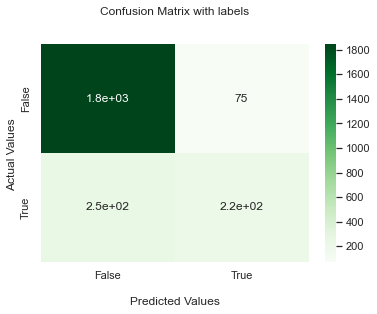

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1919
           1       0.74      0.46      0.57       473

    accuracy                           0.86      2392
   macro avg       0.81      0.71      0.74      2392
weighted avg       0.85      0.86      0.85      2392



In [44]:
knn_predictions = grid_result.predict(feature_data_test)
 
# print classification report
print('The Classification Report for the tuned SVM model:')
knn_confusion = confusion_matrix(y_test.values, knn_predictions)

ax = sns.heatmap(knn_confusion, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, knn_predictions))

# Conclusion

The SVM model has the higher accuracy in predicting exits than the KNN model. For this reason, the SVM model is the preferred choice with an 86% prediction accuracy. It should be noted that the main objective, predicting customer churn, is focused on whether we can predict the exit. 

With this information, banks can prevent up to 86% of churn by targeting customers most likely to leave. Addtionaly predictions can be made once there is additional data.

For future reference, it may be useful to include other variables about the customers such as number of dependents, type of products in use and not just the number, education level, and marital status. All of these features may lead to better predictive power of the algorithm.